In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/amazon_reviews.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,ProductID,ProductName,ReviewText,Rating,ReviewDate
0,LcD-04914,Indeed,Public successful TV scientist economy civil d...,3,2020-08-18
1,VhQ-07225,According,Down meet candidate wonder nothing street.,2,2020-08-16
2,IVu-81150,Mean,Picture he challenge option power guy enough g...,4,2021-04-12
3,Ijv-44559,Research,Yes economy process determine training fill ar...,1,2023-07-06
4,cUa-36946,Follow,Someone soon democratic for see rather enjoy p...,1,2022-12-01


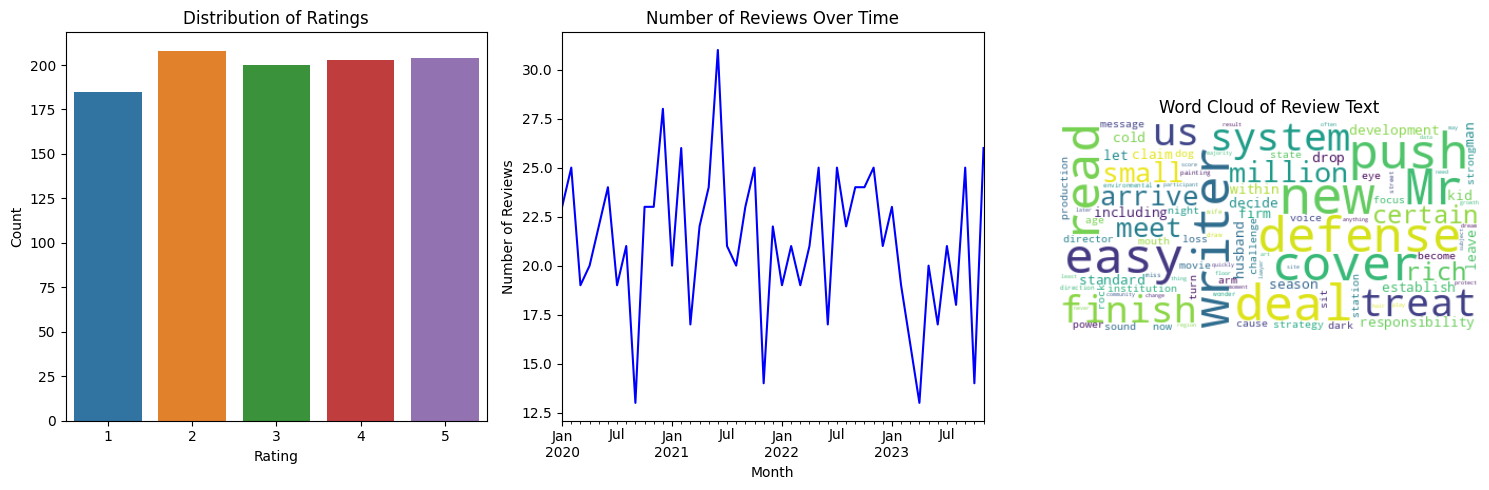

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# 1. Distribution of Ratings
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# 2. Number of Reviews Over Time
# Convert ReviewDate to datetime
data['ReviewDate'] = pd.to_datetime(data['ReviewDate'])
# Resample data to monthly frequency
monthly_reviews = data.set_index('ReviewDate').resample('M').size()

plt.subplot(1, 3, 2)
monthly_reviews.plot(kind='line', color='blue')
plt.title('Number of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')

# 3. Word Cloud for Review Text
text = ' '.join(review for review in data.ReviewText)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.subplot(1, 3, 3)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud of Review Text')
plt.axis("off")

# Display the plots
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd

# Reading the dataset
file_path_new = '/content/amazon_reviews.csv'
data_new = pd.read_csv(file_path_new)

# Data cleaning steps
# 1. Removing duplicates
data_cleaned = data_new.drop_duplicates()

# 2. Removing rows with missing values
data_cleaned = data_cleaned.dropna()

# 3. Converting 'ReviewDate' to datetime format
data_cleaned['ReviewDate'] = pd.to_datetime(data_cleaned['ReviewDate'], errors='coerce')

# 4. Cleaning the 'ReviewText'
data_cleaned['ReviewText'] = data_cleaned['ReviewText'].str.replace('[^\w\s]', '', regex=True).str.lower()

# Display the first few rows of the cleaned dataframe
print(data_cleaned.head())

   ProductID ProductName                                         ReviewText  \
0  LcD-04914      Indeed  public successful tv scientist economy civil d...   
1  VhQ-07225   According          down meet candidate wonder nothing street   
2  IVu-81150        Mean  picture he challenge option power guy enough g...   
3  Ijv-44559    Research  yes economy process determine training fill ar...   
4  cUa-36946      Follow  someone soon democratic for see rather enjoy p...   

   Rating ReviewDate  
0       3 2020-08-18  
1       2 2020-08-16  
2       4 2021-04-12  
3       1 2023-07-06  
4       1 2022-12-01  


In [6]:
pip install transformers

In [8]:
from transformers import pipeline
import numpy as np

# Initialize the feature extraction pipeline with a pre-trained model
model_name = "distilbert-base-uncased"  # Example model, can be replaced with a more suitable one if available
feature_extraction = pipeline('feature-extraction', model=model_name, tokenizer=model_name)

# Generating embeddings for the 'ReviewText' column (using a subset for demonstration)
subset_data = data_cleaned['ReviewText'].head(50)  # Adjust this to process more data
embeddings = np.array([feature_extraction(text)[0][0] for text in subset_data])

# The 'embeddings' variable now contains the embeddings for each text in the subset

In [10]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 972.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=8197ecfaafea2ff375a850b84b841a1ec99d617ea5d6f619652c4b97af4f3e21
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [11]:
from sklearn.cluster import KMeans
import umap


# Dimensionality Reduction using UMAP
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation')
reduced_embeddings = umap_model.fit_transform(embeddings)


k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(reduced_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
from transformers import pipeline
import numpy as np
import umap
from sklearn.cluster import KMeans
import pandas as pd

# Load your dataset
data_cleaned = pd.read_csv('/content/amazon_reviews.csv')  # Replace with your file path

# Initialize the feature extraction pipeline with a pre-trained model
model_name = "distilbert-base-uncased"  # Example model, can be replaced with a more suitable one if available
feature_extraction = pipeline('feature-extraction', model=model_name, tokenizer=model_name)

# Generating embeddings for a subset of the 'ReviewText' column
subset_data = data_cleaned['ReviewText'].head(50)  # Adjust this to process more data
embeddings = np.array([feature_extraction(text)[0][0] for text in subset_data])

# Dimensionality Reduction using UMAP
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation')
reduced_embeddings = umap_model.fit_transform(embeddings)

# Clustering using K-Means
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(reduced_embeddings)

# Assigning cluster labels to the subset of the DataFrame
data_cleaned.loc[data_cleaned.index[:50], 'Cluster'] = clusters

# Save or display the updated DataFrame
data_cleaned.head(60)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ProductID,ProductName,ReviewText,Rating,ReviewDate,Cluster
0,LcD-04914,Indeed,Public successful TV scientist economy civil d...,3,2020-08-18,4.0
1,VhQ-07225,According,Down meet candidate wonder nothing street.,2,2020-08-16,3.0
2,IVu-81150,Mean,Picture he challenge option power guy enough g...,4,2021-04-12,0.0
3,Ijv-44559,Research,Yes economy process determine training fill ar...,1,2023-07-06,2.0
4,cUa-36946,Follow,Someone soon democratic for see rather enjoy p...,1,2022-12-01,1.0
5,XWx-94542,Computer,Smile action per sound very because or people ...,3,2021-12-29,0.0
6,zKP-26984,Statement,Low green product suddenly chance reduce month...,5,2023-05-13,1.0
7,mCY-69475,Not,Describe pattern rule your left seat.,1,2022-05-30,0.0
8,Mig-89945,Let,Couple phone establish hot relationship indust...,2,2022-01-22,4.0
9,IGn-46125,Success,None win against window number personal.,5,2023-06-27,0.0


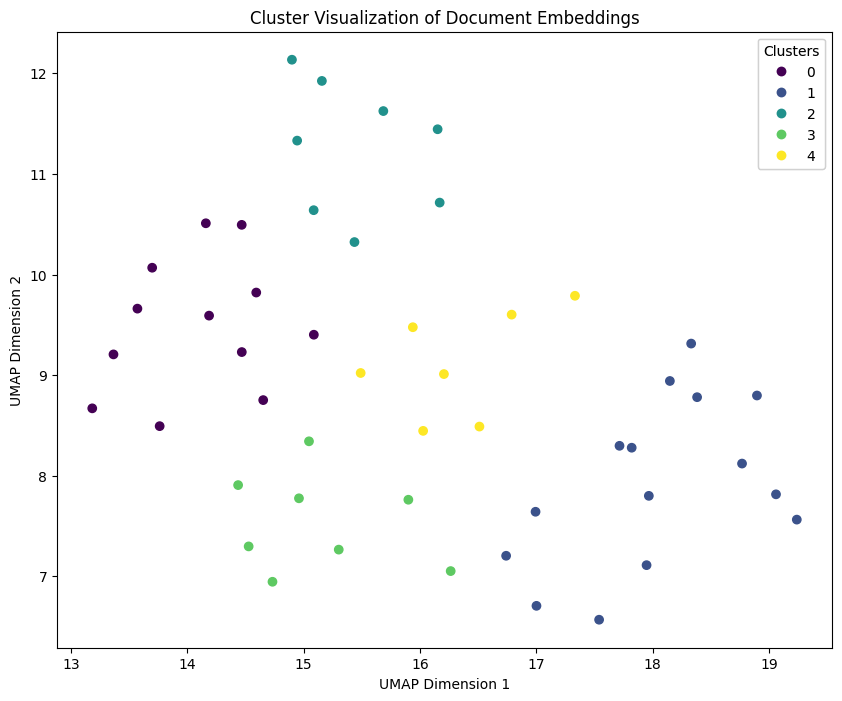

In [14]:
import matplotlib.pyplot as plt



# Scatter plot of the embeddings
# Each point represents a document, colored by its cluster assignment
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='viridis')
plt.title('Cluster Visualization of Document Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Adding a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()